# **Ames house price prediction through advanced regression techniques**

With 79 exploratory variables describing almost every features of residential homes in Ames,Iowa our taskis to predict the final price of each home. If you are a beginner on our platform come along with me through the following steps;
1.  First of all Let's read about the data that is given.In the train.csv there are 1460 rows and 81 columns whereas in test.csv there are 1459 and 80 columns.
2. After reading the file,Let us analyse the trends in both the datasets. Before moving ahead we are combining both the dataframes so that changes can be done in both the dfs together.
3. Now let us take our target variables distribution into account and make it normal thus removing the outliers.
4. Then, with the help of heatmap we can check number of nulls in each feature. So, based on the column name and after reading the description in the file data_description.txt of that column, we can decide if we want to replace nulls by mean(), mode(), median() or 'NA' or something else.
5. Now, we have to replace all the object/string values to numerical type using labelencoder function
6. Now I am separating the train and test data from all_data and appending SalePrice column to the train data and the training models starts from here.
7. While training the model, we are using Kfold cross validation for the better root mean squared log error as it is the evaluation criteria on the leaderboard.
8. Training with Gradient Boosting Regressor model: rmsle, r2_score = [0.12633287769093945] [0.881143550810682] respectively


***With 79 exploratory variables describing almost every features of residential homes in Ames,Iowa . Let us predict the final price of each home. To begin with let us prepare our environment and import the data and necessary libraries***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
print(os.listdir("../input"))

['house-prices-advanced-regression-techniques']


In [3]:
train_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Analysis
***Let us do some analysis on the dataset***

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
all_data=pd.concat((train_df,test_df)).reset_index(drop=True)
x_saleprice=train_df["SalePrice"]
all_data.drop(["SalePrice"],axis=1,inplace=True)
all_data.shape

(2919, 80)


Let us import some modules and libraries for statistical modelling and then a take a look at the saleprice distribution.Since it is really important to make your target variables ready to perform training.

In [12]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


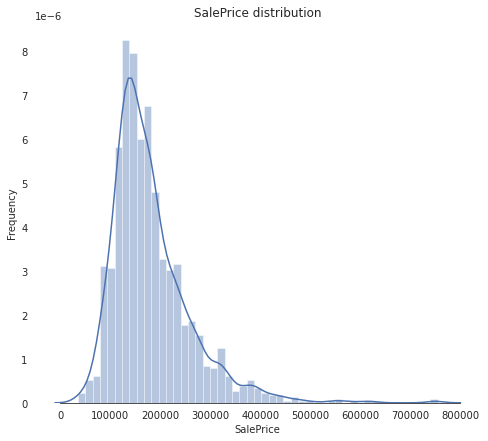

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train_df['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

Here , the SalePrice is skewed to the right. This can be a problem because normally machine learning models don't do well with data that are not normally distributed. We can apply a log(1+x) tranform to fix the skew.

In [14]:
# log(1+x) transform
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

Let us check the distribution again


 mu = 12.02 and sigma = 0.40



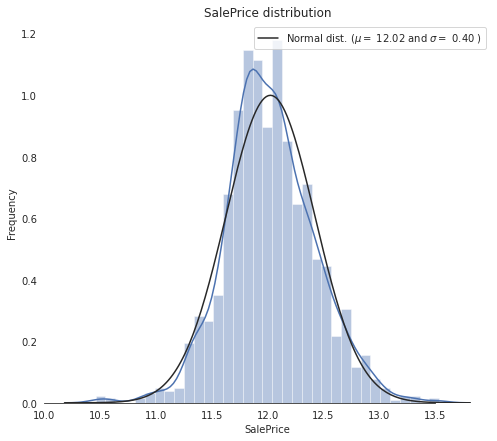

In [15]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

Woww! our saleprice feature is now normally distributed.

In [16]:
# Remove outliers
train_df.drop(train_df[(train_df['OverallQual']<5) & (train_df['SalePrice']>200000)].index, inplace=True)
train_df.drop(train_df[(train_df['GrLivArea']>4500) & (train_df['SalePrice']<300000)].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)

## Data cleaning

***Examining the dataset for null values with the help of a heatmap from seaborn ,we will then deal with the missing values accordingly.***

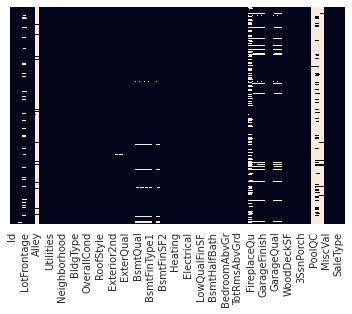

In [17]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

## Dealing with missing values

In [18]:
all_data['LotFrontage']=all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())
all_data.drop(['Alley'],inplace=True,axis=1)
all_data['BsmtQual']=all_data['BsmtQual'].fillna(all_data['BsmtQual'].mode()[0])
all_data['BsmtCond']=all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0])
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna(all_data['FireplaceQu'].mode()[0])
all_data['GarageType']=all_data['GarageType'].fillna(all_data['GarageType'].mode()[0])
all_data['GarageQual']=all_data['GarageQual'].fillna(all_data['GarageQual'].mode()[0])
all_data['GarageCond']=all_data['GarageCond'].fillna(all_data['GarageCond'].mode()[0])

all_data.drop(['PoolQC','Fence','MiscFeature','Id'],inplace=True,axis=1)
all_data['MasVnrType']=all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0])
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mode()[0])
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna(all_data['BsmtExposure'].mode()[0])
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna(all_data['BsmtFinType1'].mode()[0])
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna(all_data['BsmtFinType2'].mode()[0])
all_data.drop(['GarageYrBlt'],inplace=True,axis=1)
all_data['GarageFinish']=all_data['GarageFinish'].fillna(all_data['GarageFinish'].mode()[0])
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])







                                                

In [19]:
all_data['Utilities']=all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['Exterior1st']=all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna(all_data['BsmtFinType1'].mode()[0])
all_data['BsmtFinSF1']=all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].mean())
all_data['BsmtFinSF2']=all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].mean())
all_data['BsmtUnfSF']=all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].mean())
all_data['TotalBsmtSF']=all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mean())
all_data['BsmtFullBath']=all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mode()[0])
all_data['BsmtHalfBath']=all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Functional']=all_data['Functional'].fillna(all_data['Functional'].mode()[0])
all_data['GarageCars']=all_data['GarageCars'].fillna(all_data['GarageCars'].mean())
all_data['GarageArea']=all_data['GarageArea'].fillna(all_data['GarageArea'].mean())
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


Let us now ensure that there are not any missing values

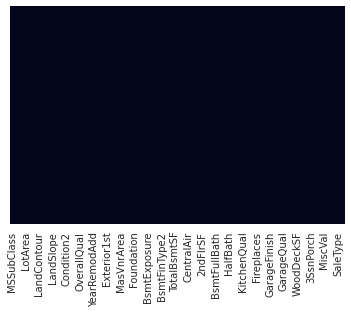

In [20]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

 ### Awesome!! we are good to go

## Handling categorical features

In [21]:

categorical_feature_mask = all_data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = all_data.columns[categorical_feature_mask].tolist()

In [22]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
len(categorical_cols)

39

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data[categorical_cols] = all_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [25]:
all_data.shape

(2919, 74)

In [26]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


## Preprocessing data for model selection

In [27]:
train_df = all_data.iloc[:1460,:]  
test_df = all_data.iloc[1460 :,:]  

In [28]:
train_df["SalePrice"] = x_saleprice

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [30]:
X_train=train_df.drop(['SalePrice'],axis=1)
y_train=train_df['SalePrice']
X_test=test_df

In [31]:
X_train.shape

(1460, 74)

## Creating and tuning the model

In [32]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_log_error

n_folds = 5

cv = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train.values)

def test_model(model):   
    msle = make_scorer(mean_squared_log_error)
    rmsle = np.sqrt(cross_val_score(model, X_train, y_train, cv=cv, scoring = msle))
    score_rmsle = [rmsle.mean()]
    return score_rmsle

def test_model_r2(model):
    r2 = make_scorer(r2_score)
    r2_error = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score_r2 = [r2_error.mean()]
    return score_r2

### ***Hyper-Parameter tuning***

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=1250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

rmsle_ggr = test_model(reg_gbr)
print (rmsle_ggr, test_model_r2(reg_gbr))

[0.1261214818146185] [0.8786488538911271]


In [34]:
reg_gbr.fit(X_train, y_train)
y_pred  = reg_gbr.predict(test_df) 

In [35]:
y_pred

array([125208.93598948, 169818.22634397, 184102.21999844, ...,
       171829.01213286, 128728.02947243, 212485.87329485])

In [36]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])

In [37]:
y_pred.head()

,SalePrice
0,125208.935989
1,169818.226344
2,184102.219998
3,197769.577593
4,188271.641010


In [38]:
y_pred.tail()

,SalePrice
1454,79365.403846
1455,81060.592494
1456,171829.012133
1457,128728.029472
1458,212485.873295


In [39]:
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
results=pd.concat([sub_df['Id'],y_pred],axis=1)

In [40]:
results.columns=['Id','SalePrice']
results.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
